<a href="https://colab.research.google.com/github/tomollow/Feel-and-Think/blob/main/K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## k平均法

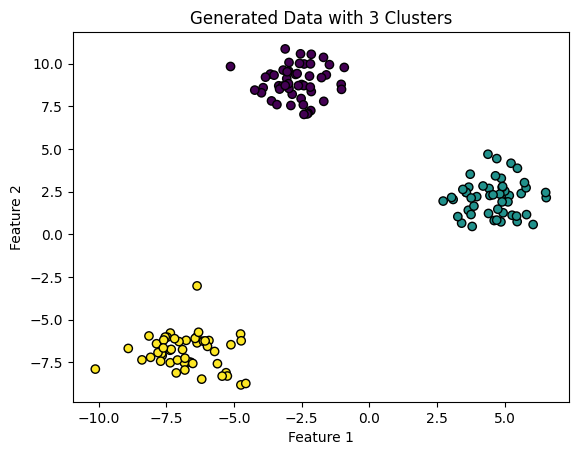

In [ ]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# クラスタ数、データポイントの数、特徴量の数を設定
k = 3
n_samples = 150
n_features = 2

# データを生成
X, y = make_blobs(n_samples=n_samples, centers=k, n_features=n_features, random_state=42)

# データをプロット
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', marker='o', edgecolor='k')
plt.title("Generated Data with 3 Clusters")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


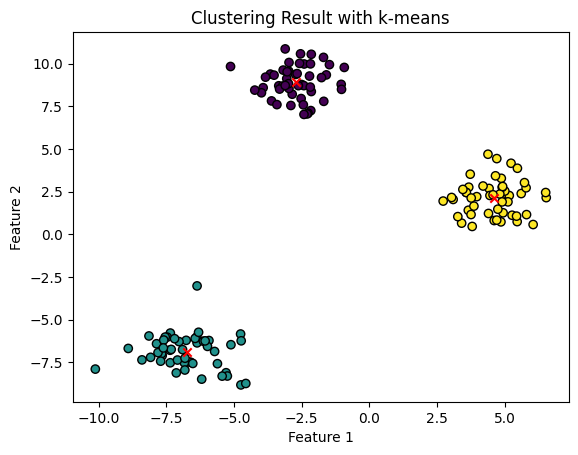

In [ ]:
from sklearn.cluster import KMeans

# k平均法を初期化
kmeans = KMeans(n_clusters=k, random_state=42)

# クラスタリングを実行
kmeans.fit(X)

# クラスタの中心点
centroids = kmeans.cluster_centers_

# クラスタのラベルを取得
labels = kmeans.labels_

# クラスタリング結果をプロット
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='o', edgecolor='k')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x')
plt.title("Clustering Result with k-means")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


## k平均法2

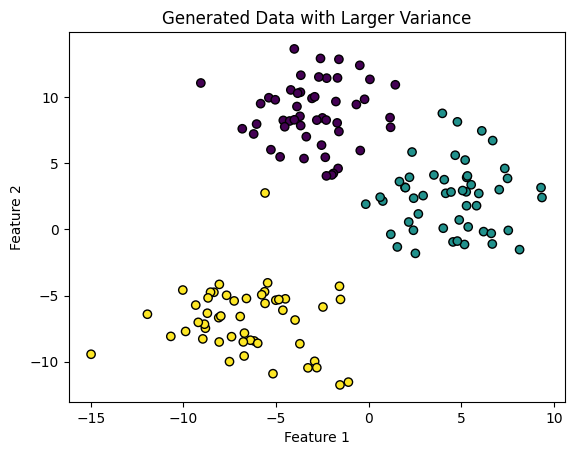

In [ ]:
# クラスタの分散を大きくするために、標準偏差を増やす
cluster_std = 2.5

# 分散が大きいデータを生成
X_large_var, y_large_var = make_blobs(n_samples=n_samples, centers=k, n_features=n_features, cluster_std=cluster_std, random_state=42)

# データをプロット
plt.scatter(X_large_var[:, 0], X_large_var[:, 1], c=y_large_var, cmap='viridis', marker='o', edgecolor='k')
plt.title("Generated Data with Larger Variance")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


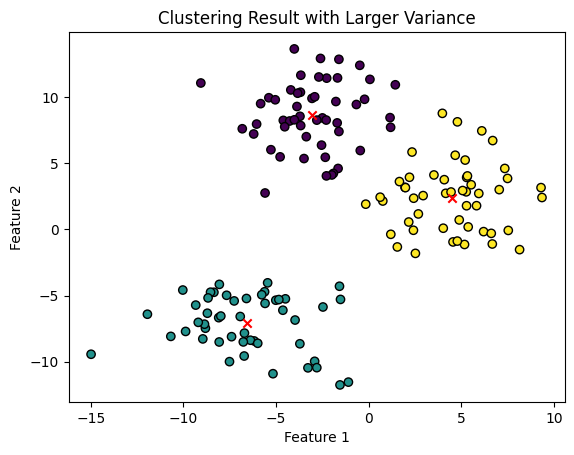

In [ ]:
# k平均法を新しいデータセットに適用
kmeans_large_var = KMeans(n_clusters=k, random_state=42)
kmeans_large_var.fit(X_large_var)

# クラスタの中心点
centroids_large_var = kmeans_large_var.cluster_centers_

# クラスタのラベルを取得
labels_large_var = kmeans_large_var.labels_

# クラスタリング結果をプロット
plt.scatter(X_large_var[:, 0], X_large_var[:, 1], c=labels_large_var, cmap='viridis', marker='o', edgecolor='k')
plt.scatter(centroids_large_var[:, 0], centroids_large_var[:, 1], c='red', marker='x')
plt.title("Clustering Result with Larger Variance")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


## 混合ガウスモデル

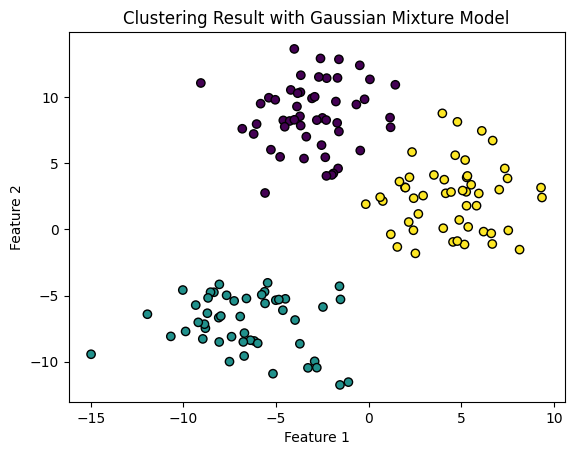

In [ ]:
from sklearn.mixture import GaussianMixture

# 混合ガウスモデルを初期化
gmm = GaussianMixture(n_components=k, random_state=42)

# クラスタリングを実行
gmm.fit(X_large_var)

# クラスタのラベルを取得
labels_gmm = gmm.predict(X_large_var)

# クラスタリング結果をプロット
plt.scatter(X_large_var[:, 0], X_large_var[:, 1], c=labels_gmm, cmap='viridis', marker='o', edgecolor='k')
plt.title("Clustering Result with Gaussian Mixture Model")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


## クラスタを5個にした場合の比較

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


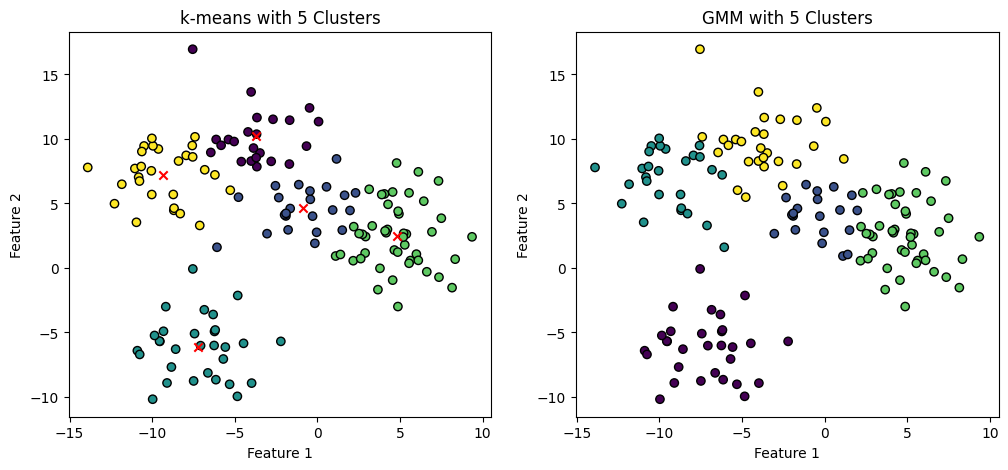

In [ ]:
# クラスタ数を5に設定
k_five = 5

# 5つのクラスタを持つデータを生成
X_five, y_five = make_blobs(n_samples=n_samples, centers=k_five, n_features=n_features, cluster_std=cluster_std, random_state=42)

# k平均法でクラスタリング
kmeans_five = KMeans(n_clusters=k_five, random_state=42)
kmeans_five.fit(X_five)
labels_kmeans_five = kmeans_five.labels_
centroids_five = kmeans_five.cluster_centers_

# 混合ガウスモデルでクラスタリング
gmm_five = GaussianMixture(n_components=k_five, random_state=42)
gmm_five.fit(X_five)
labels_gmm_five = gmm_five.predict(X_five)

# 結果をプロット
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# k平均法の結果
ax1.scatter(X_five[:, 0], X_five[:, 1], c=labels_kmeans_five, cmap='viridis', marker='o', edgecolor='k')
ax1.scatter(centroids_five[:, 0], centroids_five[:, 1], c='red', marker='x')
ax1.set_title("k-means with 5 Clusters")
ax1.set_xlabel("Feature 1")
ax1.set_ylabel("Feature 2")

# 混合ガウスモデルの結果
ax2.scatter(X_five[:, 0], X_five[:, 1], c=labels_gmm_five, cmap='viridis', marker='o', edgecolor='k')
ax2.set_title("GMM with 5 Clusters")
ax2.set_xlabel("Feature 1")
ax2.set_ylabel("Feature 2")

plt.show()


## クラスタ毎の色の調整

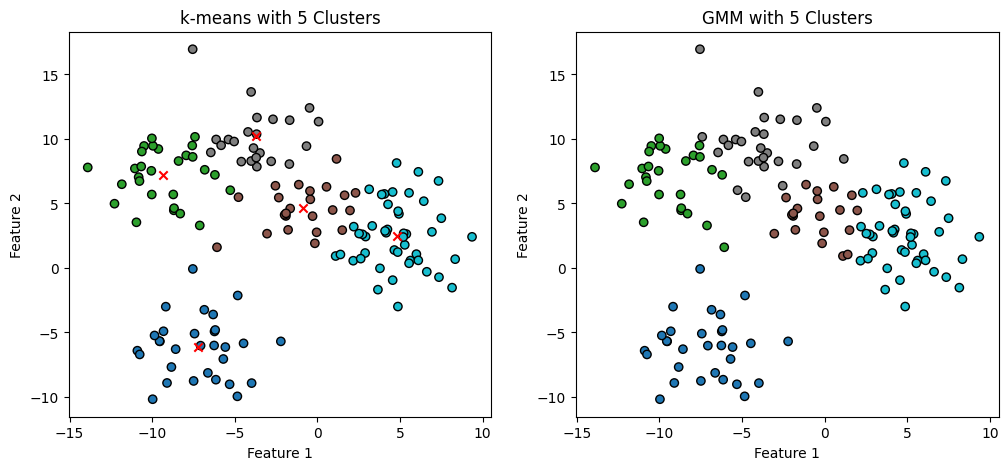

In [ ]:
import numpy as np

def relabel_clusters(centroids, labels):
    # クラスタの中心に基づいてラベルを並べ替える関数
    sorted_idx = np.argsort(np.sum(centroids, axis=1))
    lookup_table = np.zeros_like(sorted_idx)
    lookup_table[sorted_idx] = np.arange(centroids.shape[0])
    return lookup_table[labels]

# k平均法のラベルを並べ替え
relabelled_kmeans_labels = relabel_clusters(centroids_five, labels_kmeans_five)

# GMMのラベルを並べ替え
relabelled_gmm_labels = relabel_clusters(gmm_five.means_, labels_gmm_five)

# 結果を再度プロット
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# k平均法の結果
ax1.scatter(X_five[:, 0], X_five[:, 1], c=relabelled_kmeans_labels, cmap='tab10', marker='o', edgecolor='k')
ax1.scatter(centroids_five[:, 0], centroids_five[:, 1], c='red', marker='x')
ax1.set_title("k-means with 5 Clusters")
ax1.set_xlabel("Feature 1")
ax1.set_ylabel("Feature 2")

# 混合ガウスモデルの結果
ax2.scatter(X_five[:, 0], X_five[:, 1], c=relabelled_gmm_labels, cmap='tab10', marker='o', edgecolor='k')
ax2.set_title("GMM with 5 Clusters")
ax2.set_xlabel("Feature 1")
ax2.set_ylabel("Feature 2")

plt.show()
